Welcome to this notebook. In this notebook ensemble classifier algorithms are demonstrated.<br>
Written by Bart Bozon, please copy & use as you would like.

# Loading the data #

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
#
# origin: https://documentation.sas.com/doc/en/statug/15.2/statug_sashelp_sect012.htm
# For each of the seven species (bream, roach, whitefish, parkki, perch, pike, and smelt),
# the weight, length, height, and width of each fish are tallied.
# Three different length measurements are recorded: from the nose of the fish to the beginning
# of its tail, from the nose to the notch of its tail, and from the nose to the end of its tail.
#
df = pd.read_csv(url)
df.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


# Random Forest classifier #

accuracy is : 0.9375


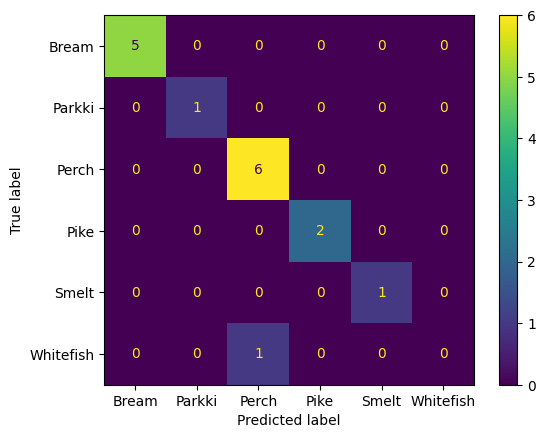

In [ ]:
X=df.drop(['Category','Species'],axis=1)
y=df['Species']
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)                                                     # train the model
pred = model.predict(X_validation)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))

# XGBoost Classifier #

accuracy is : 0.875


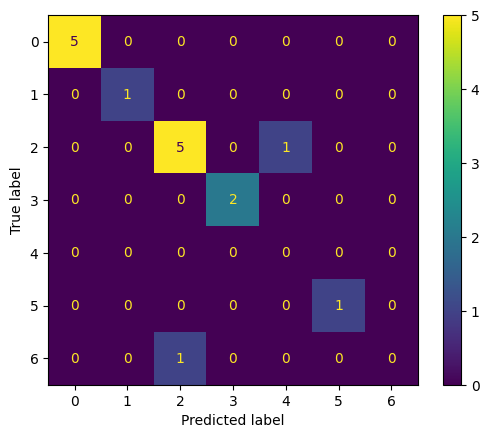

In [ ]:
!sudo pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X=df.drop(['Category','Species'],axis=1)
y=df['Species']
# Encode string labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))

# LightGBM #

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 6
[LightGBM] [Info] Start training from score -1.625311
[LightGBM] [Info] Start training from score -2.541602
[LightGBM] [Info] Start training from score -0.994039
[LightGBM] [Info] Start training from score -2.205130
[LightGBM] [Info] Start training from score -1.899748
[LightGBM] [Info] Start training from score -2.646963
[LightGBM] [Info] Start training from score -3.745575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

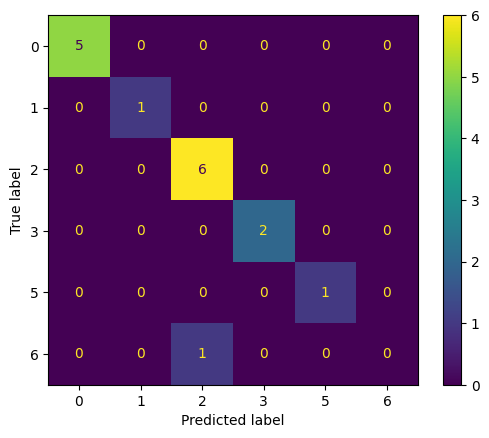

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X=df.drop(['Category','Species'],axis=1)
y=df['Species']
# Encode string labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_validation, label=y_validation)

# Set LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(label_encoder.classes_),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,  # No limit
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)
prediction_prob = model.predict(X_validation)
pred = [list(x).index(max(x)) for x in prediction_prob]     # Get class with max probability

from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))